In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd



In [69]:
data_311 = pd.read_csv("data/311_lifestyle_all.csv")

data_311.head()

data_311.columns



/var/folders/wy/50c5sv7n4wsfhhww_wwjz2tr0000gn/T/ipykernel_42275/1015536657.py:1: DtypeWarning: Columns (15,25) have mixed types. Specify dtype option on import or set low_memory=False.
  data_311 = pd.read_csv("data/311_lifestyle_all.csv")


Index(['Join_Count', 'TARGET_FID', 'case_enquiry_id', 'open_dt',
       'sla_target_dt', 'closed_dt', 'on_time', 'case_status',
       'closure_reason', 'case_title', 'subject', 'reason', 'type', 'queue',
       'department', 'submitted_photo', 'closed_photo', 'location',
       'fire_district', 'pwd_district', 'city_council_district',
       'police_district', 'neighborhood', 'neighborhood_services_district',
       'ward', 'precinct', 'location_street_name', 'location_zipcode',
       'latitude', 'longitude', 'geom_4326', 'source', 'lifestyle_cnt'],
      dtype='object')

In [70]:
print(data_311.columns)

Index(['Join_Count', 'TARGET_FID', 'case_enquiry_id', 'open_dt',
       'sla_target_dt', 'closed_dt', 'on_time', 'case_status',
       'closure_reason', 'case_title', 'subject', 'reason', 'type', 'queue',
       'department', 'submitted_photo', 'closed_photo', 'location',
       'fire_district', 'pwd_district', 'city_council_district',
       'police_district', 'neighborhood', 'neighborhood_services_district',
       'ward', 'precinct', 'location_street_name', 'location_zipcode',
       'latitude', 'longitude', 'geom_4326', 'source', 'lifestyle_cnt'],
      dtype='object')


In [71]:
life0 = data_311[data_311["lifestyle_cnt"] == 0]
life1 = data_311[data_311["lifestyle_cnt"] > 0]
life2 = data_311[data_311["lifestyle_cnt"] > 1]
life3 = data_311[data_311["lifestyle_cnt"] > 2]
life4 = data_311[data_311["lifestyle_cnt"] > 3]

# print the count of each type
print(len(life0))
print(len(life1))
print(len(life2))
print(len(life3))
print(len(life4))


631980
467677
253411
124785
3832


In [ ]:
# show what are the 10 most common reasons for 311 calls
# for each life1, life2, life3, life4
column = "reason"
count = 5

print(life1[column].value_counts().head(count))
print(life2[column].value_counts().head(count))
print(life3[column].value_counts().head(count))
print(life4[column].value_counts().head(count))




reason
Enforcement & Abandoned Vehicles    106664
Street Cleaning                      89416
Code Enforcement                     60292
Highway Maintenance                  46891
Needle Program                       19784
Sanitation                           18777
Signs & Signals                      18061
Street Lights                        15691
Name: count, dtype: int64
reason
Enforcement & Abandoned Vehicles    52908
Street Cleaning                     51003
Code Enforcement                    33875
Highway Maintenance                 29361
Needle Program                      12568
Signs & Signals                      9763
Street Lights                        9260
Park Maintenance & Safety            8785
Name: count, dtype: int64
reason
Enforcement & Abandoned Vehicles    26658
Street Cleaning                     24443
Code Enforcement                    15913
Highway Maintenance                 14829
Needle Program                       5523
Park Maintenance & Safety            

In [86]:
life0_reason = life0[column].value_counts().head(count)
life1_reason = life1[column].value_counts().head(count)
life2_reason = life2[column].value_counts().head(count)
life3_reason = life3[column].value_counts().head(count)
life4_reason = life4[column].value_counts().head(count)

# Convert Series to sets to find differences
life0_set = set(life0_reason.index)
life1_set = set(life1_reason.index)
life2_set = set(life2_reason.index)
life3_set = set(life3_reason.index)
life4_set = set(life4_reason.index)

# Check differences between sets
print("Reasons in life0 but not in life1:", life0_set - life1_set)
print("Reasons in life1 but not in life2:", life1_set - life2_set)
print("Reasons in life1 but not in life3:", life1_set - life3_set) 
print("Reasons in life1 but not in life4:", life1_set - life4_set)

Reasons in life0 but not in life1: {'Trees', 'Recycling'}
Reasons in life1 but not in life2: {'Sanitation'}
Reasons in life1 but not in life3: {'Sanitation'}
Reasons in life1 but not in life4: {'Sanitation'}


In [87]:
# create a table for life1_reason, life2_reason, life3_reason, life4_reason
life0_rank = life0_reason.rank(method="dense", ascending=False)
life1_rank = life1_reason.rank(method="dense", ascending=False)
life2_rank = life2_reason.rank(method="dense", ascending=False)
life3_rank = life3_reason.rank(method="dense", ascending=False)
life4_rank = life4_reason.rank(method="dense", ascending=False)


print(life1_rank)

reason
Enforcement & Abandoned Vehicles    1.0
Street Cleaning                     2.0
Code Enforcement                    3.0
Highway Maintenance                 4.0
Needle Program                      5.0
Sanitation                          6.0
Signs & Signals                     7.0
Street Lights                       8.0
Name: count, dtype: float64


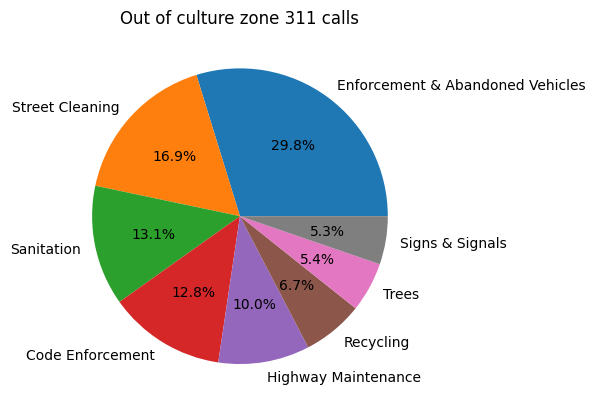

In [88]:
# pie chart for life0 
plt.pie(life0_reason.values, labels=life0_reason.index, autopct='%1.1f%%')
plt.title("Out of culture zone 311 calls")
plt.show()


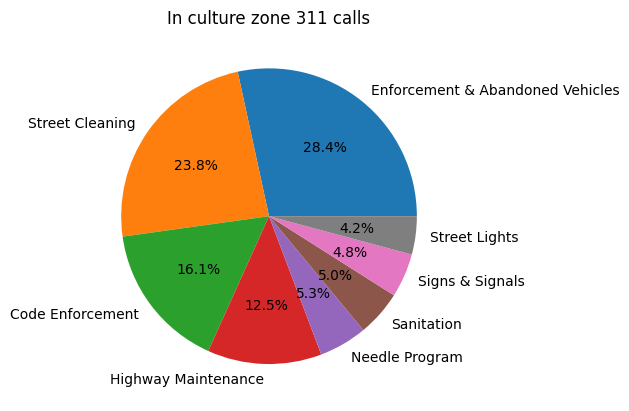

In [89]:
plt.pie(life1_reason.values, labels=life1_reason.index, autopct='%1.1f%%')
plt.title("In culture zone 311 calls")
plt.show()

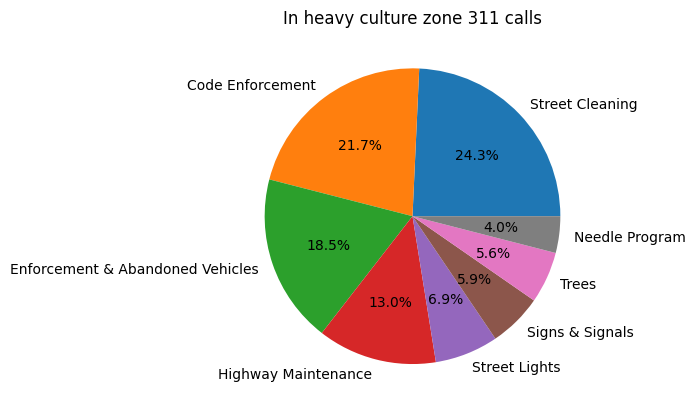

In [90]:
plt.pie(life4_reason.values, labels=life4_reason.index, autopct='%1.1f%%')
plt.title("In heavy culture zone 311 calls")
plt.show()

In [83]:
# create a table that merge life1_rank, life2_rank, life3_rank, life4_rank

life_ranks = pd.DataFrame({
    "life0": life0_rank,
    "life1": life1_rank,
    "life2": life2_rank,
    "life3": life3_rank,
    "life4": life4_rank
})
print(life_ranks)



                                  life0  life1  life2  life3  life4
reason                                                             
Code Enforcement                    4.0    3.0    3.0    3.0    2.0
Enforcement & Abandoned Vehicles    1.0    1.0    1.0    1.0    3.0
Highway Maintenance                 5.0    4.0    4.0    4.0    4.0
Needle Program                      NaN    5.0    5.0    5.0    NaN
Sanitation                          3.0    NaN    NaN    NaN    NaN
Street Cleaning                     2.0    2.0    2.0    2.0    1.0
Street Lights                       NaN    NaN    NaN    NaN    5.0
